# The Seattle Public Library and MacMillan Publishers eBook Embargo

Thomas Winegarden  
2019-12-09  
Final Project Report  
DATA 512 (Autumn 2019) Human Centered Data Science  
University of Washington  


## Introduction

In October of this year the King County Library System (KCLS) announced that it would [no longer purchase newly released eBooks from Macmillan Publishers](https://kcls.org/news/kcls-boycotts-macmillan-publishers-ebook-embargo/) starting November 1st, 2019. This came in response to [Macmillan Publishers decision to place an embargo on sales of ebooks to US libraries](https://www.publishersweekly.com/binary-data/ARTICLE_ATTACHMENT/file/000/004/4222-1.pdf) due to the effects digital checkouts were having on ebook sales. This decision by Macmillan will also be affecting The Seattle Public Library (SPL) and news of the embargo and its possible effects have motivated me to understand and investigate the impact this may have on Seattle's readers. I urge readers of this report to read NPR's article on the issues at hand, ['You May Have To Wait To Borrow A New E-Book From The Library'](https://www.npr.org/2019/11/01/775150979/you-may-have-to-wait-to-borrow-a-new-e-book-from-the-library).


This notebook is a final project for The University of Washington's Human Centered Data Science course (DATA 512) taught by [Jonathan Morgan](https://jtmorgan.net/). This notebook based report is meant to meet and exceed the [assignment 7 requirements](https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)/Assignments#A7:_Final_project_report) and was modeled after [Rex Thompson's Report on Paid Street Parking](https://github.com/rexthompson/DATA-512-Final-Project/blob/master/DATA-512-Final-Project.ipynb) per instructor recommendation.

#### Research Question 1: Which type of readers will be affected by Macmillan’s eBook embargo?

#### Research Question 2: What is the possible impact if SPL also boycotts Macmillan?

#### Research Question 2 (Revised): If SPL were to have boycotted Macmillan in 2018, what would the impact have been?



## Reproducibility

This analysis contained in this report is meant to be fully reproducible. The [Checkouts by Title data](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6) is publicly available through Seattle governments Open Data Program. However this dataset exceeds Github's current individual file size limit and is therefore if one wishes to reproduce with the full data set please visit the link above and download as csv. If for some reason the link is no longer available please visit https://data.seattle.gov/ and search for "Checkouts by Title" or "Checkouts".  

Below is the versioning information of my local system for the below analysis:

In [44]:
version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

## Setup  

Please make sure the following R packages are installed in your R environment before running the code below.  
 - [data.table](https://cran.r-project.org/web/packages/data.table/index.html)
 - [zoo](https://cran.r-project.org/web/packages/zoo/index.html)

In [3]:
# setup
suppressMessages(library(data.table))
suppressMessages(library(zoo))

In [4]:
options(scipen=5)
set.seed(42);

## Data

This analysis relies on the [Checkouts by Title dataset](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6) which is publicly available through Seattle governments Open Data Program.

First we import the dataset provided by Seattle Open Data Program using [Fast And Friendly File Finagler](https://www.rdocumentation.org/packages/data.table/versions/1.12.6/topics/fread)

In [5]:
#import data
checkoutsDT <- fread("Checkouts_by_Title.csv")

Lets take a look at the headers.

In [42]:
head(checkoutsDT)

UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
Physical,Horizon,BOOK,2006,9,1,Henry Plantagenet; a biography [by] Richard Barber.,"Barber, Richard W.","Henry II King of England 1133 1189, Great Britain History Henry II 1154 1189",Roy Publishers,"[1967, c1964]"
Physical,Horizon,BOOK,2006,9,1,The White Fox chronicles / Gary Paulsen.,"Paulsen, Gary","Heroes Juvenile fiction, War stories, Science fiction Juvenile fiction","Delacorte Press,",c2000.
Physical,Horizon,BOOK,2006,9,3,The Kingfisher treasury of ghost stories / chosen by Kenneth Ireland ; illustrated by Tony Morris.,,"Ghosts Fiction, Short stories","Kingfisher,",[2005]
Physical,Horizon,SOUNDCASS,2006,9,1,square root of murder,,Mystery and detective stories,,
Physical,Horizon,BOOK,2006,9,2,"I got a """"D"""" in salami / by Henry Winkler and Lin Oliver.","Winkler, Henry, 1945-","Report cards Juvenile fiction, Schools Fiction","Grosset & Dunlap,",c2003.
Physical,Horizon,BOOK,2006,9,6,Hope other dangerous pursuits,,"Psychological fiction, Immigrants Fiction, Spain Fiction, Morocco Fiction, Moroccans Spain Fiction, Lifeboats Fiction",,


Below is code using data.table to break the initial import in to sub tables for analysis.

In [6]:
#Creating sub tables for ease of analysis
#DON'T USE SORT INSIDE OF SUM GROUP BY

#yearly bucketing of checkout sums
yearlyCheckoutSums<-checkoutsDT[, sum(Checkouts),by=list(CheckoutYear)]
yearlyCheckoutSums<-setorder(yearlyCheckoutSums, CheckoutYear)

#Digital checkouts
DigitalCheckoutsDT<-checkoutsDT[UsageClass == "Digital"]
yearlyDigitalCheckoutSums<-DigitalCheckoutsDT[, sum(Checkouts),by=list(CheckoutYear)]
yearlyDigitalCheckoutSums<-setorder(yearlyDigitalCheckoutSums, CheckoutYear)

#Phyical checkouts
PhysicalCheckoutsDT<-checkoutsDT[UsageClass == "Physical"]
yearlyPhysicalCheckoutSums<-PhysicalCheckoutsDT[, sum(Checkouts),by=list(CheckoutYear)]
yearlyPhysicalCheckoutSums<-setorder(yearlyPhysicalCheckoutSums, CheckoutYear)

SevenYrDigitalDT<-DigitalCheckoutsDT[CheckoutYear >= 2012 
                                     & CheckoutYear != 2019]
yearlySevenYrDigitalSums<-SevenYrDigitalDT[, sum(Checkouts),by=list(CheckoutYear)]
yearlySevenYrDigitalSums<-setorder(yearlySevenYrDigitalSums, CheckoutYear)

#MacMillan Digital Checkouts
MacmillanDigitalCheckoutsDT<-DigitalCheckoutsDT[Publisher == "Macmillan Publishers" 
                                                & CheckoutYear >= 2012 
                                                & CheckoutYear != 2019]
yearlyMacmillanDigitalCheckoutSums<-MacmillanDigitalCheckoutsDT[, sum(Checkouts),by=list(CheckoutYear)]
yearlyMacmillanDigitalCheckoutSums<-setorder(yearlyMacmillanDigitalCheckoutSums, CheckoutYear)

#Non MacMillan Digital Checkouts
NotMacDigitalCheckoutsDT<-DigitalCheckoutsDT[Publisher != "Macmillan Publishers" 
                                             & CheckoutYear >= 2012
                                             & CheckoutYear != 2019]
yearlyNotMacDigitalCheckoutSums<-NotMacDigitalCheckoutsDT[, sum(Checkouts),by=list(CheckoutYear)]
yearlyNotMacDigitalCheckoutSums<-setorder(yearlyNotMacDigitalCheckoutSums, CheckoutYear)

## Understanding eBooks at SPL

Before I tackle the research questions posed above. I think it easiest for the reader to first understand the scale of ebook checkouts at SPL, how it they have been growing, and Macmillan's position in ebook checkout counts.

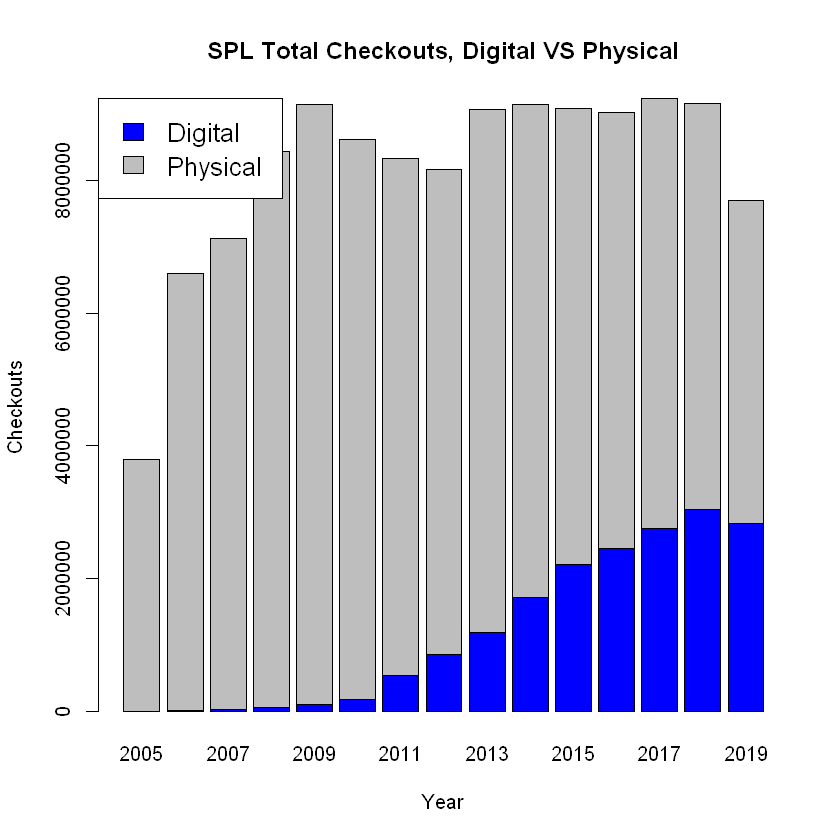

In [7]:
# Create the input vectors.
colors = c("blue","grey")
years <- yearlyCheckoutSums$CheckoutYear
regions <- c("Digital", "Physical")

Nyears = dim(yearlyCheckoutSums)[1]

# Create the matrix of the values.
Values <- matrix(c(yearlyDigitalCheckoutSums$V1, yearlyPhysicalCheckoutSums$V1), 
                 nrow = 2, ncol = Nyears, byrow = TRUE)

# Give the chart file a name
#png(file = "SPL_Digital_VS_Phyiscal_Checkouts.png")

# Create the bar chart
barplot(Values, main = "SPL Total Checkouts, Digital VS Physical", names.arg = years, 
        xlab = "Year", ylab = "Checkouts", col = colors)

# Add the legend to the chart
legend("topleft", regions, cex = 1.3, fill = colors)

# Save the file.
#dev.off()

As you can see in the chart above, the percentage of digital checkouts as part of the total amount of checkouts at SPL over the years has been increasing. In 2018 digital checkouts consisted of over 33% of all checkouts at SPL. The Bar is smaller in 2019 because at the time of this analysis 2019 has not concluded.

In [45]:
#first year percent
yearlyDigitalCheckoutSums$V1[Nyears-11]/yearlyCheckoutSums$V1[Nyears-11]

[1] 0.007577781

In [46]:
#2018 percent digital
yearlyDigitalCheckoutSums$V1[Nyears-1]/yearlyCheckoutSums$V1[Nyears-1]

[1] 0.3329831

In [47]:
#total 2018 digital
yearlyDigitalCheckoutSums$V1[Nyears-1]

[1] 3046521

In [48]:
#total 2018 checkouts
yearlyCheckoutSums$V1[Nyears-1]

[1] 9149176

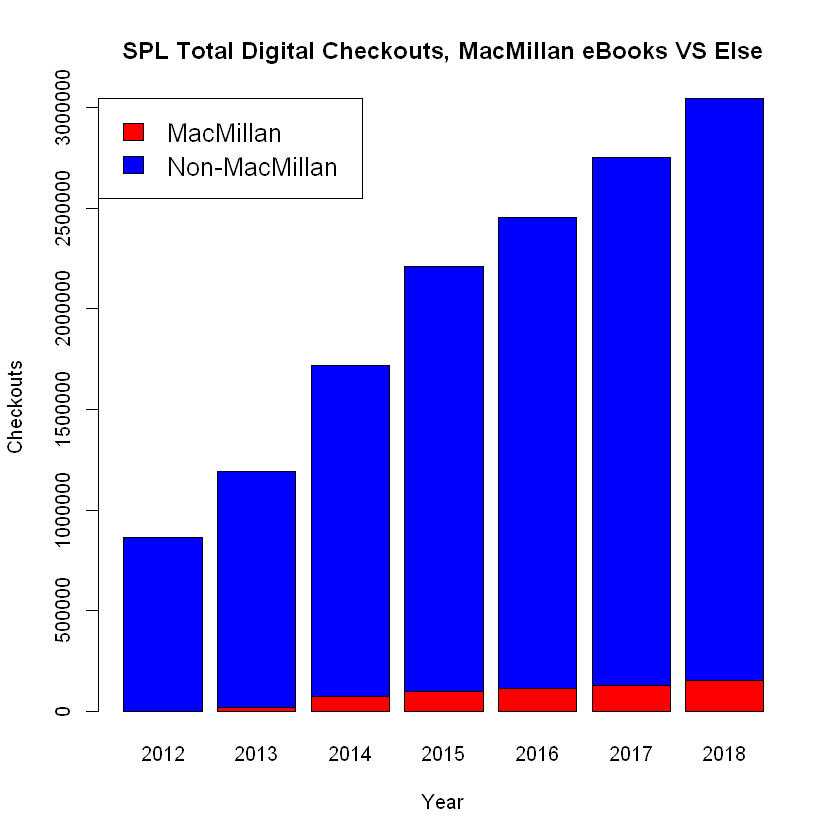

In [8]:
# Create the input vectors.
colors = c("red","blue")
years <- yearlyMacmillanDigitalCheckoutSums$CheckoutYear
regions <- c("MacMillan", "Non-MacMillan")

NyearsD = dim(yearlyMacmillanDigitalCheckoutSums)[1]

# Create the matrix of the values.
Values <- matrix(c(yearlyMacmillanDigitalCheckoutSums$V1, yearlyNotMacDigitalCheckoutSums$V1), 
                 nrow = 2, ncol = NyearsD, byrow = TRUE)

# Give the chart file a name
#png(file = "MacMillan_Digital_Checkouts.png")

# Create the bar chart
barplot(Values, main = "SPL Total Digital Checkouts, MacMillan eBooks VS Else", names.arg = years, 
        xlab = "Year", ylab = "Checkouts", col = colors)

# Add the legend to the chart
legend("topleft", regions, cex = 1.3, fill = colors)

# Save the file.
#dev.off()

The above chart shows that Macmillan's ebook checkouts have been growing alongside digital checkouts at SPL. In 2018 Macmillan Publishers ebook checkouts was ~5% of all digital checkouts at SPL. In 2012 that was almost non existant.

In [28]:
#2012 Macmillan over total digital
yearlyMacmillanDigitalCheckoutSums$V1[1]/(yearlyMacmillanDigitalCheckoutSums$V1[1]
                                               +yearlyNotMacDigitalCheckoutSums$V1[1])


#yearlyMacmillanDigitalCheckoutSums$V1[NyearsD]
#yearlyNotMacDigitalCheckoutSums$V1[NyearsD]
#2018 sum of digital
#yearlyMacmillanDigitalCheckoutSums$V1[NyearsD]+yearlyNotMacDigitalCheckoutSums$V1[NyearsD]

[1] 0.00001273263

In [29]:
#2018 Macmillan over total digital
yearlyMacmillanDigitalCheckoutSums$V1[NyearsD]/(yearlyMacmillanDigitalCheckoutSums$V1[NyearsD]
                                               +yearlyNotMacDigitalCheckoutSums$V1[NyearsD])

[1] 0.05047364

In [30]:
#2018 total Macmillan checkouts
yearlyMacmillanDigitalCheckoutSums$V1[NyearsD]

[1] 153769

In [11]:
#Digital checkout summing for
DigitalCheckouts2018DT<-DigitalCheckoutsDT[CheckoutYear == 2018]
publisherDigital2018Sums<-DigitalCheckouts2018DT[, sum(Checkouts),by=list(Publisher)]
publisherDigital2018Sums<-setorder(publisherDigital2018Sums, V1)

In [12]:
macDigitalCheckouts2018DT<-MacmillanDigitalCheckoutsDT[CheckoutYear == 2018]
subjectsMacDigital2018Sums<-macDigitalCheckouts2018DT[, sum(Checkouts),by=list(Subjects),]
subjectsMacDigital2018Sums<-setorder(subjectsMacDigital2018Sums, -V1)

To get a feel for what kind of Macmillan titles were popular with Seattle readers below I have organized the new titles released in 2018 by checkout count below.

In [13]:
macDigitalCheckouts2018Pub2018DT<-MacmillanDigitalCheckoutsDT[CheckoutYear == 2018 & PublicationYear == 2018]
titlesMacDigital2018Sums<-macDigitalCheckouts2018Pub2018DT[, sum(Checkouts),by=list(Title),]
titlesMacDigital2018Sums<-setorder(titlesMacDigital2018Sums, -V1)
titlesMacDigital2018Sums[V1 >= 100]

Title,V1
The Great Alone: A Novel,1672
Fire and Fury: Inside the Trump White House,1504
Factfulness: Ten Reasons We're Wrong About the Worldâ€”and Why Things Are Better Than You Think,1245
"Children of Blood and Bone: Children of OrÃsha Series, Book 1",872
"A Higher Loyalty: Truth, Lies, and Leadership",814
The Wife Between Us: A Novel,694
"Dark in Death: In Death Series, Book 46",525
"Force of Nature: Aaron Falk Series, Book 2",459
Shelter in Place,412
Sometimes I Lie: A Novel,393


## Research Question 1
### Which type of readers will be affected by Macmillan’s eBook embargo?



The total amount of checkouts of Macmillan Publishers eBooks by Seattle Public Library readers in 2018 was:

In [31]:
sum(subjectsMacDigital2018Sums$V1)

[1] 153769

Of the total, Titles described as Nonfiction totalled

In [32]:
sum(subjectsMacDigital2018Sums[like(Subjects,"Nonfiction")]$V1)

[1] 30794

or this percent:

In [33]:
sum(subjectsMacDigital2018Sums[like(Subjects,"Nonfiction")]$V1) / sum(subjectsMacDigital2018Sums$V1)

[1] 0.2002614

Of the total, Titles described as of the Fiction subject totalled:

In [37]:
sum(subjectsMacDigital2018Sums[like(Subjects,"Fiction")]$V1)

[1] 122972

or this percent:

In [38]:
sum(subjectsMacDigital2018Sums[like(Subjects,"Fiction")]$V1) / sum(subjectsMacDigital2018Sums$V1)

[1] 0.7997191

Of the total, Titles described as of the Science Fiction subject totalled:

In [39]:
sum(subjectsMacDigital2018Sums[like(Subjects,"Science Fiction")]$V1)

[1] 20640

Of the total, Titles described as of the Fantasy subject totalled:

In [40]:
sum(subjectsMacDigital2018Sums[like(Subjects,"Fantasy")]$V1)

[1] 24506

Of the total, Titles described as of the Mystery subject totalled:

In [41]:
sum(subjectsMacDigital2018Sums[like(Subjects,"Mystery")]$V1)

[1] 30738

These do no pie chart well as there is overlab due to multiple titles in the data

## Research Question 2 
### What is the possible impact if SPL also boycotts Macmillan?  

This was the question initally presented in the in-class presentation and is intentionally broad. This question could be analyzed with various approaches and can be broken down in to many sub questions. To list some:
 - What would the amount of Macmillan Publishers ebook checkouts be in 2020 and 2021?
 - Will the physical checkout of Macmillan Publisher titles increase due to checkout limitations on ebooks?
 - Will the Boycott of Macmillan Publishers by the neighboring library system KCLS increase SPL ebook checkouts?
 - Which kinds of people will the potential boycott effect?
 - What is the potential financial impact to Macmillan Publishers?

Due to the myriad of factors affecting the future outlook for checkouts of ebooks at SPL I decided it would be more precise and easier to present the results if 2018 was used as an assumption to evaluate the impact statement. Below I have revised the research question and answered it.

## Research Question 2 (Revised)
### If SPL were to have boycotted Macmillan in 2018, what would the impact have been?

If in SPL would have boycotted Macmillan Publishers in 2018 then 800+ titles would not have been available as ebooks for checkout.

In [23]:
#Titles that would have been unavailable in 2018
dim(titlesMacDigital2018Sums)

[1] 809   2

Let us also examine the amount of checkouts of new 2018 titles that occured in 2018.

In [24]:
#Distinct Titles released in 2018 checked out in 2018
sum(titlesMacDigital2018Sums$V1)

[1] 34780

Based on what libraries are supposed to pay for new Macmillan Publishers ebooks we can multiply the total amount of checkouts of new titles in 2018 by the new price ($60). This would be a $2 Million impact!

In [25]:
sum(titlesMacDigital2018Sums$V1) * 60

[1] 2086800

However this is not the way libraries work at all. If instead we apply the 5-to-1 ratio guidance proposed by KCLS to this figure then the impact looks a lot smaller at $417,360.

In [26]:
sum(titlesMacDigital2018Sums$V1) * 60 * .2

[1] 417360

In the Macmillan Publishers communication they use the figure, $ 12.99, and if we adopt that figure the total financial impact would be $ 450,140.

In [27]:
sum(titlesMacDigital2018Sums$V1) * 13

[1] 452140

## Data Limitations

The dataset I found to be surpisingly clean and was able to quantify a lot based on checkouts. I believe the data limitation in this current area is the lack of KCLS checkout data. This is the largest US library system and I was disappointed to not be able to find their checkout data.

## What the Data Does Not Tell You

The data does not have an personal information about anyone checking out these books. It also does not include which branch location data or any location data in general. Because the demographics of the readers of these ebooks was not available it makes it difficult to answer exactly who would be impacted. However, this is greatly to the benefit of the privacy of Seattle's readers!

## An Opinion From A Local Librarian

I was forunate enough to get a response from one of the local librarians I reached out to. They asked to remain anonymous but I believe their reponse is a very valuable call out to the human centered impact the embargo and potential boycott will have.

 - “It directly impacts patrons with disability and mobility issues that rely on eBook access.” - Anonymous Librarian Informant
 - “eBooks are available to populations who can’t prove their residence through ecards that don’t grant physically borrowing rights.” - Anonymous Librarian Informant
 - “Collective power may be necessary to stand up to this embargo, it’s hard to make a case against limiting patron access by taking it away entirely as is the actual effect of the KCLS boycott.” - Anonymous Librarian Informant

## Opportunities for Additional Analyis

 - As long as Seattle's Open Data Program continues to provide and update the Checkouts by Title dataset there will be opportunity to examine that actual changes to Macmillan Publishers ebook checkouts in the following years as more data becomes available.
 - There is also opportunity to include the KCLS's checkout data if that is ever made public.
 - There is opportunity provide projects in to 2020 and 2021 based on current trend. However inclusion of KCLS if it is found publicly available would greatly improve justifying projections for the Seattle area.
 - There is opportunity to improve financial data based on book sale price history if that dataset can be found publicly available.
 - I would like to attempt to reproduce the TOR imprint embargo of 2017 with this dataset.

## Conclusions

Fans of fiction novels will be the largest effected when we examine checkouts by subject for Macmillan. Though Macmillan only consists of 5% of digital checkouts, I believe this will have a noticable impact to many readers. There are many titles from the 2018 list that are well known and best sellers and if Macmillan authors continue to publish some best seller every year then the fiction fans will be upset they will not have immediate access via the library.

Though it is difficult to predict the scale of impact in future years if SPL were to boycott. I believe I can confidently claim that by using 2018 as a baseline proxy that over 35,000 checkouts per year would be affected. This would mean readers would have to go elsewhere to satisfy their demand. This also comes with a financial impact for Macmillan. This is what they are expecting in some ways however, and their financial analysis led them to make this embargo decision. It will be interesting to see how this evolves as more data is released. I am particularly interested on how long KCLS will continue to boycott and if Seattle joins.

The Seattle Library System needs to be very careful when making the decision to boycott Macmillan Publishers. At the moment they are staying on the safe side and not joining KCLS in boycotting. I believe that this is actually in the best interest of Seattle readers especially specific populations such as people with disabilities, mobility issues, or even location issues. I think a field study that is human focused on SPL readers should be carried out before they join in. It also needs to be said that Seattle may see some of the demand for Macmillan ebooks shifted over from KCLS to them and as a provider for those with issues above they morally should continue to provide and not boycott.


## References
Seattle Open Data Program Checkouts by Title Dataset: 
KCLS boycott of Macmillan comm: https://kcls.org/news/kcls-boycotts-macmillan-publishers-ebook-embargo/
Stranger Article I took screenshot of: https://www.thestranger.com/slog/2019/10/22/41762476/king-county-public-library-will-boycott-macmillan-ebooks-seattle-public-library-will-not
NPR: https://www.npr.org/2019/11/01/775150979/you-may-have-to-wait-to-borrow-a-new-e-book-from-the-library

## Other Resources

### On R

R Reproducability: https://mran.microsoft.com/documents/rro/reproducibility

R data.table is good: https://eliocamp.github.io/codigo-r/en/2019/07/why-i-love-data-table/
    data.table intro: https://cran.r-project.org/web/packages/data.table/vignettes/datatable-intro.html
    data.table sum one liner with lapply: https://stackoverflow.com/questions/30180590/data-table-sum-and-subset

Cool R guide: https://r4ds.had.co.nz/data-visualisation.html

### On the Embargo and Libraries

https://www.overdrive.com/publishers/st-martins-publishing-group?autoLibrary=t&autoRegion=f&rf-publishDate=2018-12-04&rt-publishDate=2019-09-04&sort=popularity&sd=desc

https://en.wikipedia.org/wiki/Macmillan_Publishers

https://www.owler.com/company/macmillan

KCLS leads ebook checkouts in US: https://kcls.org/news/kcls-tops-overdrive-digital-checkouts-in-2017/

KCLS boycott of Macmillan comm: https://kcls.org/news/kcls-boycotts-macmillan-publishers-ebook-embargo/

SPL Budget: https://www.spl.org/about-us/the-organization/budget-and-operations/budget

TOR Imprint Embargo Statement: https://www.ualibrary.org/mediasrvc/blog/statement-release-regarding-tor-digital-books

TOR Embargo: https://www.publishersweekly.com/pw/by-topic/industry-news/libraries/article/77532-tor-scales-back-library-e-book-lending-as-part-of-test.html

TOR top sellers: https://us.macmillan.com/search?collection=top-sellers&supapress_order=publishdate-desc&page_number=3&format=MEBB&imprint=tor-books

Stranger Article I took screenshot of: https://www.thestranger.com/slog/2019/10/22/41762476/king-county-public-library-will-boycott-macmillan-ebooks-seattle-public-library-will-not

NPR: https://www.npr.org/2019/11/01/775150979/you-may-have-to-wait-to-borrow-a-new-e-book-from-the-library

ALA report: http://www.ala.org/news/sites/ala.org.news/files/content/mediapresscenter/CompetitionDigitalMarkets.pdf

Panorama Project US Library data report: https://static1.squarespace.com/static/5ae8ec5f70e8024a05804e7a/t/5c00229e6d2a73e6ae5478a5/1543512743044/Community+Reading+Event+Impact+Report+v1.pdf

### Similar Research

Jason Sanford doing similar research: https://www.patreon.com/posts/does-library-tor-28075188

Someone's powerbi on the same dataset: https://community.powerbi.com/t5/Data-Stories-Gallery/Readership-in-Seattle-by-Decisive-Data/td-p/224252

### Other datasets (unused)

NY Times Books API: https://developer.nytimes.com/docs/books-product/1/overview
